In [36]:
!virtualenv project_env

PermissionError: [WinError 5] Access is denied: 'C:\\Users\\boude\\Desktop\\Eurisko\\project_Eurisko\\project_env\\Scripts\\python.exe'


In [37]:
!project_env\Scripts\python -m pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!project_env\Scripts\python -m pip install tensorflow

Looking in indexes: https://download.pytorch.org/whl/cu118



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
!project_env\Scripts\python -m pip install ipykernel
!project_env\Scripts\python -m ipykernel install --user --name=project_env --display-name "Python (project_env)"


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Installed kernelspec project_env in C:\Users\boude\AppData\Roaming\jupyter\kernels\project_env


In [39]:
!project_env\Scripts\python -m pip install tqdm 
!project_env\Scripts\python -m  pip install scikit-learn


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
!project_env\Scripts\python -m  pip install transformers 
!project_env\Scripts\python -m  pip install evaluate


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
!project_env\Scripts\python -m pip install tf-keras



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
!project_env\Scripts\python -m pip install accelerate -U 


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
!project_env\Scripts\python -m pip install transformers[torch]


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
!project_env\Scripts\python -m pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
!project_env\Scripts\python -m pip install tensorflow==2.17.0


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
!project_env\Scripts\python -m pip install streamlit


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
!project_env\Scripts\python -m pip install opencv-python


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
!project_env\Scripts\python -m pip install matplotlib
!project_env\Scripts\python -m pip install seaborn



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
import torch
import os
import sys
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
from torch import nn, optim
from torch.optim.lr_scheduler import LambdaLR
from PIL import Image
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tqdm import tqdm
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [50]:
!pip list

Package                   Version
------------------------- ------------
absl-py                   2.1.0
accelerate                0.33.0
aiohappyeyeballs          2.3.7
aiohttp                   3.10.3
aiosignal                 1.3.1
alembic                   1.13.2
altair                    5.4.0
annotated-types           0.7.0
anyio                     4.4.0
asttokens                 2.4.1
astunparse                1.6.3
attrs                     24.2.0
blinker                   1.8.2
cachetools                5.5.0
certifi                   2024.7.4
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
colorlog                  6.8.2
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
datasets                  2.21.0
debugpy                   1.8.5
decorator                 5.1.1
dill                      0.3.8
distro                    1.9.0
evaluate                  0.4.2
executing             

In [51]:
print(sys.executable)

c:\Users\boude\Desktop\Eurisko\project_Eurisko\project_env\Scripts\python.exe


In [52]:
#checking GPU presence 
print(torch.cuda.is_available())  
print(torch.cuda.get_device_name(0))  

True
NVIDIA GeForce RTX 4060 Laptop GPU


In [53]:
torch.cuda.empty_cache()

In [54]:

# Define the paths to your training and validation data
train_data_path = r"C:\Users\boude\Desktop\Eurisko\project_Eurisko\train_filtered"
valid_data_path = r"C:\Users\boude\Desktop\Eurisko\project_Eurisko\valid_filtered"

In [55]:
class CustomImageProcessor:
    def __init__(self, do_normalize=True, do_resize=True, do_random_resized_crop=True, 
                 do_random_horizontal_flip=True, do_center_crop=False, 
                 feature_extractor_type="ViTFeatureExtractor",
                 image_mean=[0.485, 0.456, 0.406], image_std=[0.229, 0.224, 0.225], 
                 resample=Image.BILINEAR, size=224, crop_size=224, flip_prob=0.5):
        self.do_normalize = do_normalize
        self.do_resize = do_resize
        self.do_random_resized_crop = do_random_resized_crop
        self.do_random_horizontal_flip = do_random_horizontal_flip
        self.do_center_crop = do_center_crop
        self.feature_extractor_type = feature_extractor_type
        self.image_mean = image_mean
        self.image_std = image_std
        self.resample = resample
        self.size = size
        self.crop_size = crop_size
        self.flip_prob = flip_prob
        
        self.transform = self.build_transform()

    def build_transform(self):
        transform_list = []
        
        if self.do_random_resized_crop:
            transform_list.append(transforms.RandomResizedCrop(self.crop_size, interpolation=self.resample))
        
        if self.do_random_horizontal_flip:
            transform_list.append(transforms.RandomHorizontalFlip(p=self.flip_prob))
        
        if self.do_resize:
            transform_list.append(transforms.Resize(self.size, interpolation=self.resample))
        
        if self.do_center_crop:
            transform_list.append(transforms.CenterCrop(self.crop_size))
        
        transform_list.append(transforms.ToTensor())
        
        if self.do_normalize:
            transform_list.append(transforms.Normalize(mean=self.image_mean, std=self.image_std))
        
        return transforms.Compose(transform_list)

    def __call__(self, image):
        return self.transform(image)



In [56]:
custom_processor = CustomImageProcessor(
    do_normalize=True,
    do_resize=True,
    do_random_resized_crop=True,
    do_random_horizontal_flip=True,
    do_center_crop=False,
    image_mean=[0.485, 0.456, 0.406],
    image_std=[0.229, 0.224, 0.225],
    resample=Image.BILINEAR,
    size=224,
    crop_size=224,
    flip_prob=0.5
)

In [57]:
# Apply the custom processor to your training/validation dataset
training_set = datasets.ImageFolder(root=train_data_path, transform=custom_processor)
validation_set = datasets.ImageFolder(root=valid_data_path, transform=custom_processor)

In [58]:
training_loader = DataLoader(training_set, batch_size=64, shuffle=True)
validation_loader = DataLoader(validation_set, batch_size=64, shuffle=True)


### Model : efficientnet_b0

In [59]:
class PlantDiseaseClassifier:
    def __init__(self, num_classes=None, learning_rate=3e-5, train_batch_size=64, eval_batch_size=64,
                 gradient_accumulation_steps=1, seed=42, betas=(0.9, 0.999), epsilon=1e-08,
                 lr_scheduler_type='linear', lr_scheduler_warmup_ratio=0.1, num_epochs=10,
                 patience=3, min_delta=0.001, device=None, load_model_dir=None, fine_tune=True,
                 fine_tune_lr=1e-5):
        
        self.device = device if device else ('cuda' if torch.cuda.is_available() else 'cpu')
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.train_batch_size = train_batch_size
        self.eval_batch_size = eval_batch_size
        self.gradient_accumulation_steps = gradient_accumulation_steps
        self.seed = seed
        self.betas = betas
        self.epsilon = epsilon
        self.lr_scheduler_type = lr_scheduler_type
        self.lr_scheduler_warmup_ratio = lr_scheduler_warmup_ratio
        self.num_epochs = num_epochs
        self.patience = patience
        self.min_delta = min_delta
        self.fine_tune = fine_tune
        self.fine_tune_lr = fine_tune_lr

        torch.manual_seed(self.seed)

        if load_model_dir:
            # Load model for inference
            self.load_model(load_model_dir)
        else:
            # Model initialization for training
            self.model = models.efficientnet_b0(pretrained=True)
            self.model.classifier[1] = nn.Linear(self.model.classifier[1].in_features, self.num_classes)
            self.model.to(self.device)
            
            # Fine-tuning configuration
            if self.fine_tune:
                for param in self.model.parameters():
                    param.requires_grad = True  # Unfreeze all layers

                # Use different learning rates for different parts of the model
                self.optimizer = optim.AdamW([
                    {'params': self.model.features.parameters(), 'lr': self.fine_tune_lr},  # Earlier layers
                    {'params': self.model.classifier.parameters(), 'lr': self.learning_rate}  # Classifier
                ], betas=self.betas, eps=self.epsilon)
            else:
                # Only train the classifier layer
                for param in self.model.features.parameters():
                    param.requires_grad = False  # Freeze the earlier layers

                self.optimizer = optim.AdamW(self.model.classifier.parameters(), lr=self.learning_rate,
                                             betas=self.betas, eps=self.epsilon)
            
            self.lr_scheduler = None
            self.criterion = nn.CrossEntropyLoss()
            
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            base_dir = os.path.join("models", f"efficientnet_b0_{timestamp}")
            self.trainer_output_dir = os.path.join(base_dir, "trainer_output")
            self.saved_model_dir = os.path.join(base_dir, "saved_model")
            
            os.makedirs(self.trainer_output_dir, exist_ok=True)
            os.makedirs(self.saved_model_dir, exist_ok=True)
            
            print(f"Model initialized. Using device: {self.device}")
            print(f"Base directory: {base_dir}")
            print(f"Trainer output directory: {self.trainer_output_dir}")
            print(f"Saved model directory: {self.saved_model_dir}")
            
            self.metrics = {'epochs': []}
            self.early_stopping_counter = 0
            self.best_accuracy = 0.0

    def _get_lr_scheduler(self, total_steps):
        """Sets up the learning rate scheduler."""
        if self.lr_scheduler_type == 'linear':
            def lr_lambda(current_step):
                if current_step < self.lr_scheduler_warmup_ratio * total_steps:
                    return float(current_step) / float(max(1, self.lr_scheduler_warmup_ratio * total_steps))
                return max(0.0, float(total_steps - current_step) / float(max(1, total_steps - self.lr_scheduler_warmup_ratio * total_steps)))
            
            return LambdaLR(self.optimizer, lr_lambda)
        else:
            raise ValueError(f"Unsupported lr_scheduler_type: {self.lr_scheduler_type}")
    
    def train(self, train_loader, valid_loader):
        total_steps = len(train_loader) * self.num_epochs
        self.lr_scheduler = self._get_lr_scheduler(total_steps)
        
        for epoch in range(self.num_epochs):
            self.model.train()
            running_loss = 0.0
            
            progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f'Epoch {epoch+1}/{self.num_epochs}')
            
            for step, (images, labels) in progress_bar:
                images, labels = images.to(self.device), labels.to(self.device)
                
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                loss.backward()
                
                if (step + 1) % self.gradient_accumulation_steps == 0:
                    self.optimizer.step()
                    self.lr_scheduler.step()
                    self.optimizer.zero_grad()
                
                running_loss += loss.item() * images.size(0)
                progress_bar.set_postfix(loss=running_loss / ((step + 1) * self.train_batch_size))
            
            epoch_loss = running_loss / len(train_loader.dataset)
            valid_accuracy, valid_precision, valid_recall, valid_f1, valid_loss = self.evaluate(valid_loader)
            
            print(f'\nEpoch [{epoch+1}/{self.num_epochs}], '
                  f'Training Loss: {epoch_loss:.4f}, '
                  f'Validation Loss: {valid_loss:.4f}, '
                  f'Validation Accuracy: {valid_accuracy:.4f}, '
                  f'Precision: {valid_precision:.4f}, '
                  f'Recall: {valid_recall:.4f}, '
                  f'F1 Score: {valid_f1:.4f}')
            
            self.metrics['epochs'].append({
                'epoch': epoch + 1,
                'train_loss': epoch_loss,
                'validation_loss': valid_loss,
                'validation_accuracy': valid_accuracy,
                'precision': valid_precision,
                'recall': valid_recall,
                'f1_score': valid_f1
            })
            
            self.save_metrics()
            
            if valid_accuracy > self.best_accuracy + self.min_delta:
                self.best_accuracy = valid_accuracy
                self.save_checkpoint(epoch, valid_accuracy)
                self.early_stopping_counter = 0
            else:
                self.early_stopping_counter += 1
                if self.early_stopping_counter >= self.patience:
                    print(f"Early stopping at epoch {epoch+1}. Best validation accuracy: {self.best_accuracy:.4f}")
                    break
    
    def evaluate(self, data_loader):
        self.model.eval()
        all_labels = []
        all_preds = []
        running_loss = 0.0
        
        with torch.no_grad():
            for images, labels in data_loader:
                images, labels = images.to(self.device), labels.to(self.device)
                
                outputs = self.model(images)
                loss = self.criterion(outputs, labels)
                running_loss += loss.item() * images.size(0)
                
                _, preds = torch.max(outputs, 1)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(preds.cpu().numpy())
        
        accuracy = accuracy_score(all_labels, all_preds)
        precision = precision_score(all_labels, all_preds, average='weighted')
        recall = recall_score(all_labels, all_preds, average='weighted')
        f1 = f1_score(all_labels, all_preds, average='weighted')
        average_loss = running_loss / len(data_loader.dataset)
        
        return accuracy, precision, recall, f1, average_loss

    def save_checkpoint(self, epoch, accuracy):
        checkpoint_path = os.path.join(self.trainer_output_dir, f'model_epoch_{epoch+1}acc{accuracy:.4f}.pth')
        torch.save(self.model.state_dict(), checkpoint_path)
        print(f'Checkpoint saved: {checkpoint_path}')
    
    def save_metrics(self):
        metrics_path = os.path.join(self.trainer_output_dir, 'trainer_state.json')
        with open(metrics_path, 'w') as f:
            json.dump(self.metrics, f, indent=4)
        print(f'Metrics saved: {metrics_path}')
    
    def save_model(self):
        model_path = os.path.join(self.saved_model_dir, 'model.pth')
        torch.save(self.model.state_dict(), model_path)
        print(f'Model saved to {model_path}')
    
    def load_model(self, model_path):
        self.model = models.efficientnet_b0(pretrained=False)
        self.model.classifier[1] = nn.Linear(self.model.classifier[1].in_features, self.num_classes)
        self.model.to(self.device)
        
        self.model.load_state_dict(torch.load(model_path, map_location=self.device))
        self.model.eval()
        print(f"Model loaded from {model_path}")

    def classify_image(self, processed_image):
        self.model.eval()
        
        processed_image = processed_image.to(self.device)
        
        with torch.no_grad():
            output = self.model(processed_image)
            _, predicted = torch.max(output, 1)
        
        return predicted.item()


In [60]:
# Instantiate the PlantDiseaseClassifier
num_classes = 41  # Update this with the correct number of classes in your dataset
classifier = PlantDiseaseClassifier(num_classes=num_classes)


Model initialized. Using device: cuda
Base directory: models\efficientnet_b0_20240824_212648
Trainer output directory: models\efficientnet_b0_20240824_212648\trainer_output
Saved model directory: models\efficientnet_b0_20240824_212648\saved_model


In [61]:
# Train the model using the prepared DataLoaders
classifier.train(train_loader=training_loader, valid_loader=validation_loader)

# After training, save the final model
classifier.save_model()

Epoch 1/10: 100%|██████████| 641/641 [09:14<00:00,  1.16it/s, loss=3.43]



Epoch [1/10], Training Loss: 3.4339, Validation Loss: 2.6702, Validation Accuracy: 0.5720, Precision: 0.5888, Recall: 0.5720, F1 Score: 0.5624
Metrics saved: models\efficientnet_b0_20240824_212648\trainer_output\trainer_state.json
Checkpoint saved: models\efficientnet_b0_20240824_212648\trainer_output\model_epoch_1acc0.5720.pth


Epoch 2/10: 100%|██████████| 641/641 [05:06<00:00,  2.09it/s, loss=1.69]



Epoch [2/10], Training Loss: 1.6922, Validation Loss: 0.9461, Validation Accuracy: 0.7879, Precision: 0.7902, Recall: 0.7879, F1 Score: 0.7840
Metrics saved: models\efficientnet_b0_20240824_212648\trainer_output\trainer_state.json
Checkpoint saved: models\efficientnet_b0_20240824_212648\trainer_output\model_epoch_2acc0.7879.pth


Epoch 3/10: 100%|██████████| 641/641 [04:56<00:00,  2.16it/s, loss=0.793]



Epoch [3/10], Training Loss: 0.7935, Validation Loss: 0.5789, Validation Accuracy: 0.8400, Precision: 0.8401, Recall: 0.8400, F1 Score: 0.8381
Metrics saved: models\efficientnet_b0_20240824_212648\trainer_output\trainer_state.json
Checkpoint saved: models\efficientnet_b0_20240824_212648\trainer_output\model_epoch_3acc0.8400.pth


Epoch 4/10: 100%|██████████| 641/641 [07:15<00:00,  1.47it/s, loss=0.564]



Epoch [4/10], Training Loss: 0.5646, Validation Loss: 0.4663, Validation Accuracy: 0.8612, Precision: 0.8622, Recall: 0.8612, F1 Score: 0.8600
Metrics saved: models\efficientnet_b0_20240824_212648\trainer_output\trainer_state.json
Checkpoint saved: models\efficientnet_b0_20240824_212648\trainer_output\model_epoch_4acc0.8612.pth


Epoch 5/10: 100%|██████████| 641/641 [05:05<00:00,  2.10it/s, loss=0.475]



Epoch [5/10], Training Loss: 0.4753, Validation Loss: 0.4043, Validation Accuracy: 0.8741, Precision: 0.8751, Recall: 0.8741, F1 Score: 0.8729
Metrics saved: models\efficientnet_b0_20240824_212648\trainer_output\trainer_state.json
Checkpoint saved: models\efficientnet_b0_20240824_212648\trainer_output\model_epoch_5acc0.8741.pth


Epoch 6/10: 100%|██████████| 641/641 [05:20<00:00,  2.00it/s, loss=0.422]



Epoch [6/10], Training Loss: 0.4221, Validation Loss: 0.3730, Validation Accuracy: 0.8806, Precision: 0.8819, Recall: 0.8806, F1 Score: 0.8798
Metrics saved: models\efficientnet_b0_20240824_212648\trainer_output\trainer_state.json
Checkpoint saved: models\efficientnet_b0_20240824_212648\trainer_output\model_epoch_6acc0.8806.pth


Epoch 7/10: 100%|██████████| 641/641 [05:14<00:00,  2.04it/s, loss=0.39] 



Epoch [7/10], Training Loss: 0.3904, Validation Loss: 0.3480, Validation Accuracy: 0.8871, Precision: 0.8879, Recall: 0.8871, F1 Score: 0.8865
Metrics saved: models\efficientnet_b0_20240824_212648\trainer_output\trainer_state.json
Checkpoint saved: models\efficientnet_b0_20240824_212648\trainer_output\model_epoch_7acc0.8871.pth


Epoch 8/10: 100%|██████████| 641/641 [04:56<00:00,  2.16it/s, loss=0.371]



Epoch [8/10], Training Loss: 0.3713, Validation Loss: 0.3322, Validation Accuracy: 0.8885, Precision: 0.8894, Recall: 0.8885, F1 Score: 0.8883
Metrics saved: models\efficientnet_b0_20240824_212648\trainer_output\trainer_state.json
Checkpoint saved: models\efficientnet_b0_20240824_212648\trainer_output\model_epoch_8acc0.8885.pth


Epoch 9/10: 100%|██████████| 641/641 [04:43<00:00,  2.26it/s, loss=0.355]



Epoch [9/10], Training Loss: 0.3557, Validation Loss: 0.3313, Validation Accuracy: 0.8911, Precision: 0.8915, Recall: 0.8911, F1 Score: 0.8899
Metrics saved: models\efficientnet_b0_20240824_212648\trainer_output\trainer_state.json
Checkpoint saved: models\efficientnet_b0_20240824_212648\trainer_output\model_epoch_9acc0.8911.pth


Epoch 10/10: 100%|██████████| 641/641 [04:44<00:00,  2.26it/s, loss=0.352]



Epoch [10/10], Training Loss: 0.3523, Validation Loss: 0.3266, Validation Accuracy: 0.8926, Precision: 0.8935, Recall: 0.8926, F1 Score: 0.8921
Metrics saved: models\efficientnet_b0_20240824_212648\trainer_output\trainer_state.json
Checkpoint saved: models\efficientnet_b0_20240824_212648\trainer_output\model_epoch_10acc0.8926.pth
Model saved to models\efficientnet_b0_20240824_212648\saved_model\model.pth


c:\Users\boude\Desktop\Eurisko\project_Eurisko\project_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\boude\Desktop\Eurisko\project_Eurisko\project_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\boude\AppData\Local\Temp\ipykernel_24536\1644427847.py:191: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In

Model loaded from /Users/boude/Desktop/Eurisko/project_Eurisko/models/efficientnet_b0_20240824_212648/trainer_output/model_epoch_10acc0.8926.pth


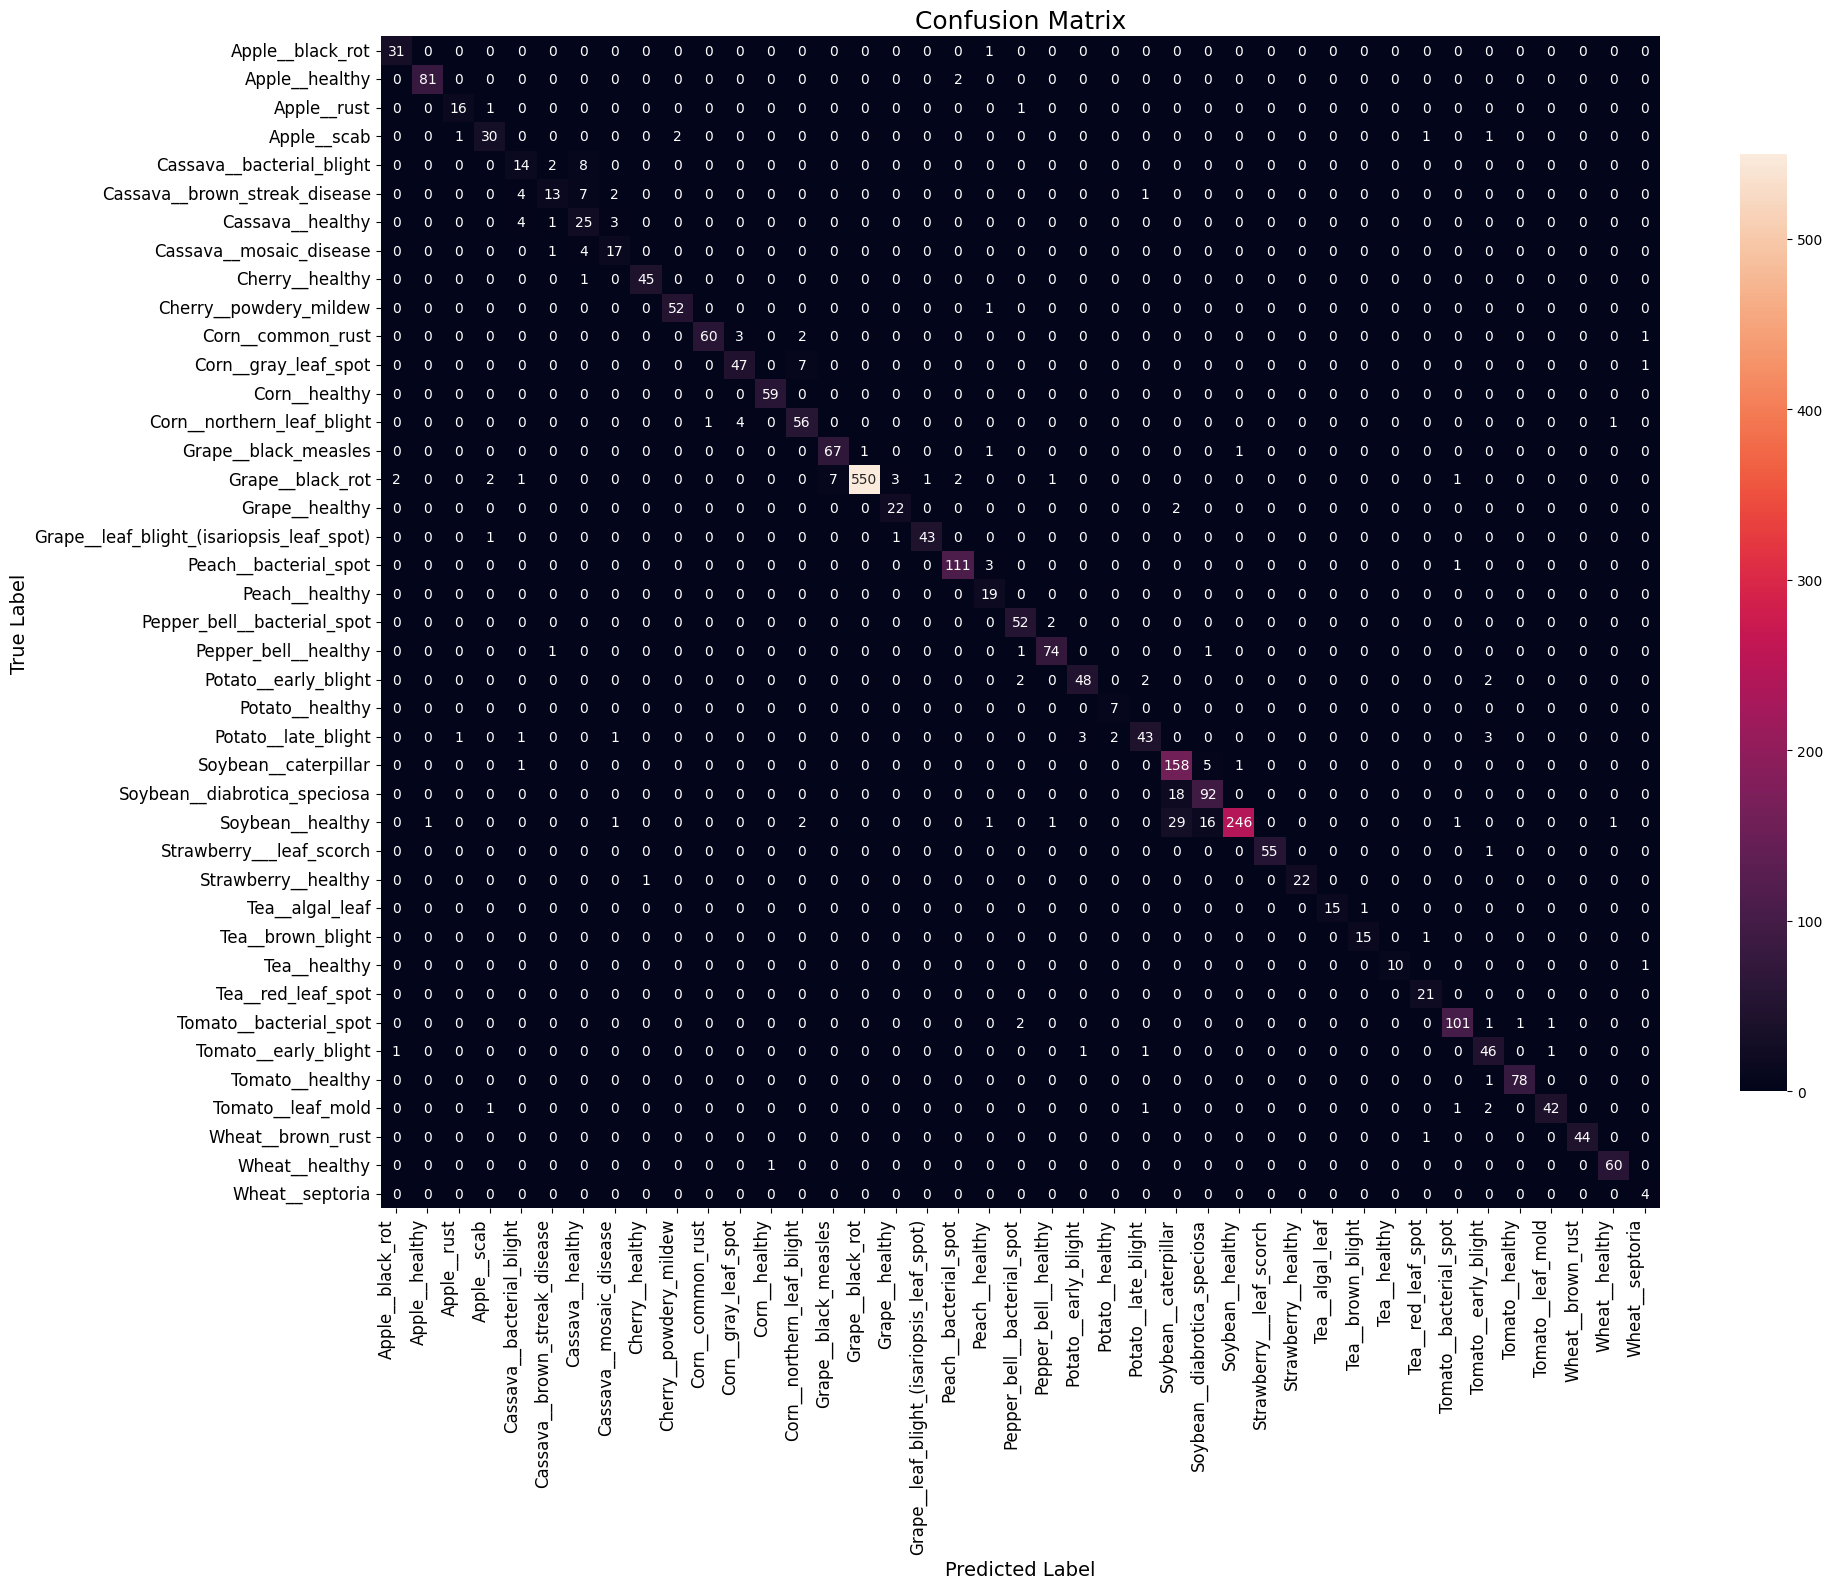

In [63]:
# Define the path to your test data
test_data_path = r"/Users/boude/Desktop/Eurisko/project_Eurisko/test"

# Load the test dataset
test_set = datasets.ImageFolder(root=test_data_path, transform=custom_processor)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

# Path to the best saved model
model_path = r"/Users/boude/Desktop/Eurisko/project_Eurisko/models/efficientnet_b0_20240824_212648/trainer_output/model_epoch_10acc0.8926.pth"

# Load the saved model weights
classifier.load_model(model_path)

# Function to generate predictions and labels
def generate_predictions_and_labels(model, data_loader):
    model.model.eval()  # Call eval() on the actual PyTorch model
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(model.device)
            labels = labels.to(model.device)
            
            outputs = model.model(images)
            _, preds = torch.max(outputs, 1)
            
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
    
    return all_labels, all_preds

# Generate predictions and labels for the test set
true_labels, predictions = generate_predictions_and_labels(classifier, test_loader)

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plotting the heatmap
plt.figure(figsize=(20, 16))  # Increase the size of the figure
sns.heatmap(cm, annot=True, fmt="d", cmap="rocket", xticklabels=test_set.classes, yticklabels=test_set.classes,
            annot_kws={"size": 10}, cbar_kws={'shrink': 0.8})  # Increase annotation size and shrink color bar
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=18)

# Rotate the tick labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust the layout for better fit
plt.show()
